#0. Libraries

In [1]:
!pip install feature-engine --quiet

In [2]:
import pandas as pd              # -> Data manipulation tool
import matplotlib.pyplot as plt  # -> Data visualization tool

#1. Load Data

Dataset available [HERE](https://www.kaggle.com/datasets/teocalvo/analytical-base-table-churn/data)

In [3]:
df = pd.read_csv('/content/abt_churn.csv')
df.head(5)

,dtRef,idUsuario,qtdeTransacoes,qtdeDias,mediaTransacoesDias,saldoPontos,qtdePontosPos,qtdePontosNeg,qtdeDiasUltimaTransacao,qtdeDiasPrimeiraTransacao,...,saldoPontosD28,qtdePontosPosD28,qtdePontosNegD28,propAvgQtdeTransacoes,propAvgQtdeDias,propAvgMediaTransacoesDias,propAvgSaldoPontos,propAvgQtdePontosPos,propAvgQtdePontosNeg,flagChurn
0,2024-06-01,000ff655-fa9f-4baa-a108-47f581ec52a1,266,27,9.851852,635,2635,-2000,1.0,89.0,...,151,151,0,3.889781,3.278281,2.135602,1.516314,4.101926,8.944444,1
1,2024-10-01,000ff655-fa9f-4baa-a108-47f581ec52a1,268,28,9.571429,686,2686,-2000,4.0,211.0,...,51,51,0,3.309865,2.567615,2.328737,1.288278,2.920954,5.167037,1
2,2024-04-01,000ff655-fa9f-4baa-a108-47f581ec52a1,188,11,17.090909,275,1275,-1000,3.0,28.0,...,275,1275,-1000,3.805468,1.820201,3.739048,0.798622,2.634551,7.162791,0
3,2024-05-01,000ff655-fa9f-4baa-a108-47f581ec52a1,262,24,10.916667,484,2484,-2000,2.0,58.0,...,107,1107,-1000,4.246216,3.255244,2.322640,1.275749,4.275765,9.922414,0
4,2024-08-01,001749bd-37b5-4b1e-8111-f9fbba90f530,1,1,1.000000,50,50,0,21.0,21.0,...,50,50,0,0.013317,0.103973,0.236635,0.104533,0.063302,0.000000,1


#2. Exploring Dataset

In [4]:
# Exploring Missing values
null = df.isna().sum().sort_values(ascending=False)
zero_count = (null != 0).sum()

# Print results
print("Number of NaNs:", zero_count)

Number of NaNs: 0


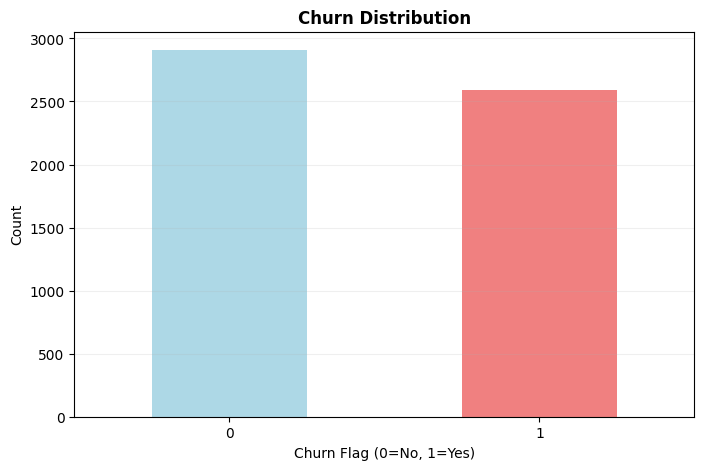

In [5]:
# Exploring the target as bar chart
plt.figure(figsize=(8, 5))

df['flagChurn'].value_counts().plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Churn Distribution', fontweight='semibold')
plt.xlabel('Churn Flag (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.2)
plt.show()

#3. Defining Target, Features and Splitting dataset
  * Train: Model training
  * Test: Standard model test
  * Last Data: Newest data for additional model check (out-of-sample)

In [6]:
df.columns

Index(['dtRef', 'idUsuario', 'qtdeTransacoes', 'qtdeDias',
       'mediaTransacoesDias', 'saldoPontos', 'qtdePontosPos', 'qtdePontosNeg',
       'qtdeDiasUltimaTransacao', 'qtdeDiasPrimeiraTransacao',
       'qtdSkuDistintos', 'qtdeChatMessage', 'qtdePresença',
       'qtdeTrocaStreamElements', 'qtdeChurn', 'qtdePonei', 'qtdeAirflowLover',
       'qtdePresencaStreak', 'qtdeDailyLoot', 'qtdeRLover', 'qtdeVendaItemRPG',
       'qtdeTransacoesD7', 'qtdeDiasD7', 'saldoPontosD7', 'qtdePontosPosD7',
       'qtdePontosNegD7', 'qtdeTransacoesD14', 'qtdeDiasD14', 'saldoPontosD14',
       'qtdePontosPosD14', 'qtdePontosNegD14', 'qtdeTransacoesD28',
       'qtdeDiasD28', 'saldoPontosD28', 'qtdePontosPosD28', 'qtdePontosNegD28',
       'propAvgQtdeTransacoes', 'propAvgQtdeDias',
       'propAvgMediaTransacoesDias', 'propAvgSaldoPontos',
       'propAvgQtdePontosPos', 'propAvgQtdePontosNeg', 'flagChurn'],
      dtype='object')

In [7]:
features = df.columns[2:-1] # -> first 2 columns are Nominal variables and excluded from features
target = 'flagChurn'

# Out-of-sample DF:
out_sample_data = df[df['dtRef'] == df['dtRef'].max()].copy()

# DF for split (in-sample data):
in_sample_data = df[df['dtRef'] < df['dtRef'].max()].copy()

# X and Y - In-sample data:
X, Y = in_sample_data[features], in_sample_data[target]

# Y - Out-of-sample data:
Y_oos = out_sample_data[target]

In [8]:
from sklearn import model_selection

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y,
                                                                    random_state=34,
                                                                    test_size=0.25,
                                                                    stratify=Y  # Same target variable proportion in Train and Test
                                                                    )


X_test.head()

,qtdeTransacoes,qtdeDias,mediaTransacoesDias,saldoPontos,qtdePontosPos,qtdePontosNeg,qtdeDiasUltimaTransacao,qtdeDiasPrimeiraTransacao,qtdSkuDistintos,qtdeChatMessage,...,qtdeDiasD28,saldoPontosD28,qtdePontosPosD28,qtdePontosNegD28,propAvgQtdeTransacoes,propAvgQtdeDias,propAvgMediaTransacoesDias,propAvgSaldoPontos,propAvgQtdePontosPos,propAvgQtdePontosNeg
692,24,15,1.600000,612,612,0,3.0,146.0,2,12,...,1,51,51,0,0.308859,1.446590,0.386973,1.206079,0.712205,0.0
2247,55,4,13.750000,202,202,0,2.0,14.0,2,52,...,4,202,202,0,0.891381,0.542541,2.925463,0.532441,0.347707,0.0
2924,11,7,1.571429,305,305,0,1.0,41.0,2,5,...,5,251,251,0,0.146485,0.727812,0.371855,0.637648,0.386142,0.0
1321,9,9,1.000000,450,450,0,4.0,30.0,1,0,...,8,400,400,0,0.298540,2.426299,0.215391,1.746485,1.532532,0.0
4718,1,1,1.000000,50,50,0,4.0,4.0,1,0,...,1,50,50,0,0.033171,0.269589,0.215391,0.194054,0.170281,0.0


#4. Preprocessing data

In [9]:
from sklearn import tree

# Using a Tree to explore feature importances:
my_tree = tree.DecisionTreeClassifier(random_state=34)
my_tree.fit(X_train, Y_train)

feature_importances = (pd.Series(my_tree.feature_importances_, index=X_train.columns) # -> convert to Series
                        .sort_values(ascending=False).reset_index()    # -> From highest to lowest
                      )

# Create accumulative column over importances:
feature_importances['acc'] = feature_importances[0].cumsum()

# Show 10 first:
feature_importances.head(10)

,index,0,acc
0,qtdeDiasD14,0.238481,0.238481
1,qtdeDiasPrimeiraTransacao,0.095680,0.334162
2,propAvgQtdeDias,0.084245,0.418407
3,qtdeDiasUltimaTransacao,0.066040,0.484447
4,propAvgQtdeTransacoes,0.053578,0.538025
5,propAvgSaldoPontos,0.041679,0.579704
6,propAvgQtdePontosPos,0.041559,0.621263
7,propAvgMediaTransacoesDias,0.032640,0.653902
8,qtdeTransacoesD28,0.028786,0.682688
9,qtdeTransacoesD7,0.027429,0.710117


In [10]:
# Filtering features by importance:
best_features = feature_importances[feature_importances['acc'] < 0.90]['index'].tolist() # -> Select best features (~90% of acc importances)
print('Number of features at 90% importance: ',len(best_features)) # = 19 -> From 40 variables we keep only 19

# Applying the filter to X variables:
X_train = X_train[best_features]
X_test = X_test[best_features]
X_oos = out_sample_data[best_features]

Number of features at 90% importance:  19


#5. Baseline model: Majority Learner

=== Benchmark Comparison ===
Majority Learner:
  - Accuracy: 53.12%
  - AUC: 0.5000


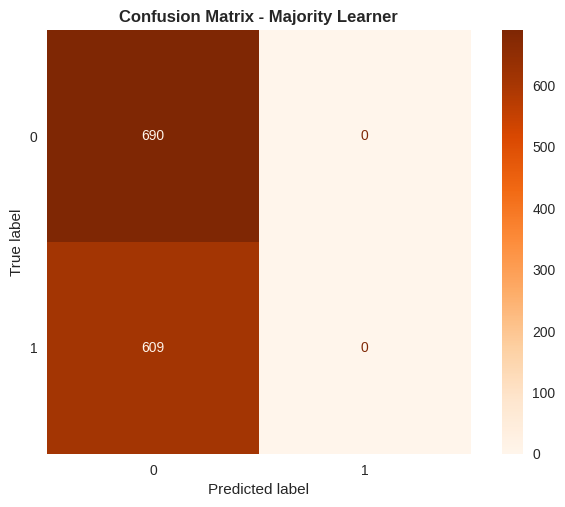

In [11]:
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

majority_learn = DummyClassifier(strategy="most_frequent")
majority_learn.fit(X_train, Y_train)

# Predictions (Dummy does not provide probabilities for AUC by default)
Y_pred_dummy = majority_learn.predict(X_test)
Y_proba_dummy = majority_learn.predict_proba(X_test)[:, 1]

# Accuracy
acc_dummy = metrics.accuracy_score(Y_test, Y_pred_dummy)

# AUC
auc_dummy = metrics.roc_auc_score(Y_test, Y_proba_dummy)

# ROC
roc_dummy = metrics.roc_curve(Y_test, Y_proba_dummy)


# Display results:
print("=== Benchmark Comparison ===")
print("Majority Learner:")
print(f'  - Accuracy: {acc_dummy*100:.2f}%')
print(f'  - AUC: {auc_dummy:.4f}')

# Confusion Matrix
cm_dummy = confusion_matrix(Y_test, Y_pred_dummy)

# Plotting CM
plt.style.use('seaborn-v0_8')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dummy, display_labels=majority_learn.classes_)
disp.plot(cmap="Oranges", values_format="d")
plt.grid(False)
plt.title("Confusion Matrix - Majority Learner", fontweight = 'bold')
plt.show()

#6. Full Pipeline

In [12]:
from sklearn import pipeline, linear_model
from feature_engine import discretisation, encoding

# Discretization: transform continuous variables into discrete features
tree_discretization = discretisation.DecisionTreeDiscretiser(
    variables = best_features,     # -> Only filtered features
    regression = False,
    bin_output = 'bin_number',
    cv=3,
  )

# One-Hot Encoding
oh_encoding = encoding.OneHotEncoder(
    variables = best_features,     # -> Only filtered features
    ignore_format = True,
  )

# Model - Logistic Regression
my_reg = linear_model.LogisticRegression(penalty=None, random_state=34, max_iter=1000000)


## ----------------------------------------
##     Defining my pipeline
## ----------------------------------------

my_pipeline = pipeline.Pipeline(
    steps = [
        ('Discretization', tree_discretization),
        ('OH_encoding', oh_encoding),
        ('Model', my_reg),
    ]
)

# Model fitting:
my_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('Discretization',
                 DecisionTreeDiscretiser(bin_output='bin_number',
                                         regression=False,
                                         variables=['qtdeDiasD14',
                                                    'qtdeDiasPrimeiraTransacao',
                                                    'propAvgQtdeDias',
                                                    'qtdeDiasUltimaTransacao',
                                                    'propAvgQtdeTransacoes',
                                                    'propAvgSaldoPontos',
                                                    'propAvgQtdePontosPos',
                                                    'propAvgMediaTransacoesDias',
                                                    'qtdeTransacoesD28',
                                                    'qtdeTransacoesD7',
                                                    'saldoPontosD28',
                                                    '...
                                          'propAvgQtdeTransacoes',
                                          'propAvgSaldoPontos',
                                          'propAvgQtdePontosPos',
                                          'propAvgMediaTransacoesDias',
                                          'qtdeTransacoesD28',
                                          'qtdeTransacoesD7', 'saldoPontosD28',
                                          'mediaTransacoesDias', 'saldoPontos',
                                          'qtdePontosPosD28', 'qtdePresença',
                                          'qtdePontosPosD7', 'qtdeTransacoes',
                                          'saldoPontosD14', 'qtdePontosPos'])),
                ('Model',
                 LogisticRegression(max_iter=1000000, penalty=None,
                                    random_state=34))])

#7. Model Metrics

###7.1. Train Data

In [13]:
from sklearn import metrics

# Compute predictions:
Y_train_predict = my_pipeline.predict(X_train)
Y_train_proba = my_pipeline.predict_proba(X_train)[:,1]   # -> Churn (target = 1) probabilities

# Accuracy
accy_train = metrics.accuracy_score(Y_train, Y_train_predict)

# AUC
auc_train = metrics.roc_auc_score(Y_train, Y_train_proba)

# ROC
roc_train = metrics.roc_curve(Y_train, Y_train_proba)

# Display results:

print('=== Logistic Regression ===')
print('A) Train Data: ')
print(f'  - Train data accuracy: {(accy_train*100):.4f}% ')
print(f'  - AUC train data: {auc_train:.4f}')

=== Logistic Regression ===
A) Train Data: 
  - Train data accuracy: 76.2455% 
  - AUC train data: 0.8475


###7.2. Test Data

In [14]:
# Compute predictions:
Y_test_predict = my_pipeline.predict(X_test)
Y_test_proba = my_pipeline.predict_proba(X_test)[:,1]   # -> Churn (target = 1) probabilities

# Accuracy
accy_test = metrics.accuracy_score(Y_test, Y_test_predict)

# AUC
auc_test = metrics.roc_auc_score(Y_test, Y_test_proba)

# ROC
roc_test = metrics.roc_curve(Y_test, Y_test_proba)

# Display results:
print('B) Test Data: ')
print(f'  - Test data accuracy: {(accy_test*100):.4f}% ')
print(f'  - AUC test data: {auc_test:.4f}')


B) Test Data: 
  - Test data accuracy: 72.7483% 
  - AUC test data: 0.8020


###7.3. Out-of-Sample Data

In [15]:
# Compute predictions:
Y_oos_predict = my_pipeline.predict(X_oos)
Y_oos_proba = my_pipeline.predict_proba(X_oos)[:,1]   # -> Churn (target = 1) probabilities

# Accuracy
accy_oos = metrics.accuracy_score(Y_oos, Y_oos_predict)

# AUC
auc_oos = metrics.roc_auc_score(Y_oos, Y_oos_proba)

# ROC
roc_oos = metrics.roc_curve(Y_oos, Y_oos_proba)

# Display results:
print('C) Out-of-sample (OOS) Data: ')
print(f'  - OOS data accuracy: {(accy_oos*100):.4f}% ')
print(f'  - AUC OOS data: {auc_oos:.4f}')


C) Out-of-sample (OOS) Data: 
  - OOS data accuracy: 77.2277% 
  - AUC OOS data: 0.8225


#8. Results visualization

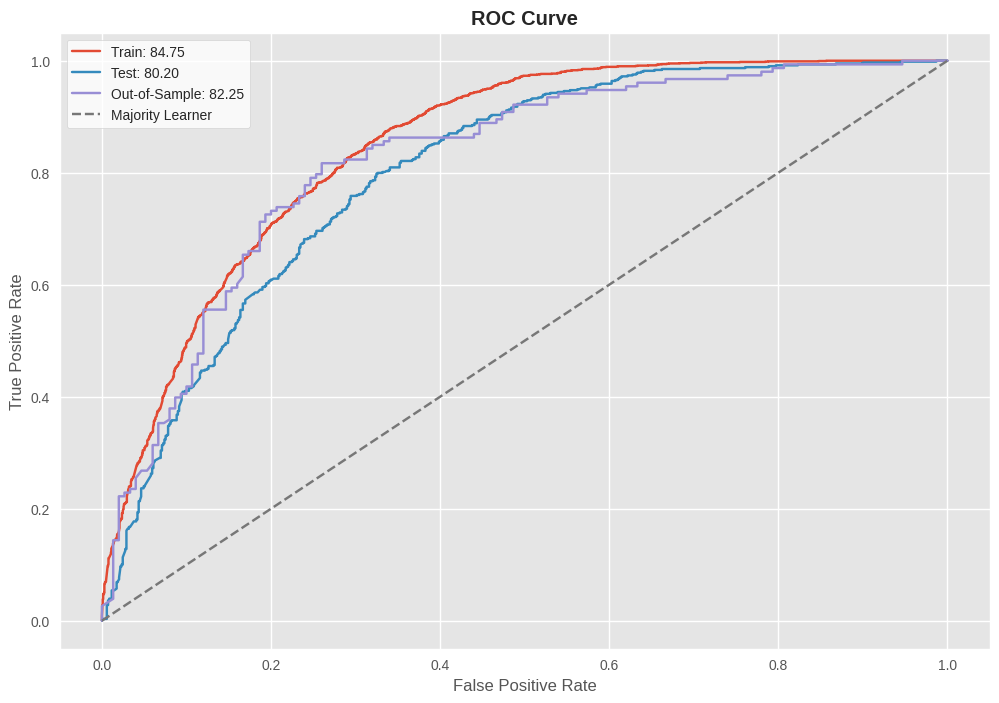

In [16]:
# Creating figure:
plt.figure(figsize=(12, 8)) # -> Set figure size

# Set style for gray background and white grid
plt.style.use('ggplot')

# Adding ROC values:
plt.plot(roc_train[0], roc_train[1], label=f"Train: {100*auc_train:.2f}")
plt.plot(roc_test[0], roc_test[1], label= f"Test: {100*auc_test:.2f}")
plt.plot(roc_oos[0], roc_oos[1], label=f"Out-of-Sample: {100*auc_oos:.2f}")
plt.plot(roc_dummy[0],roc_dummy[1], '--', label='Majority Learner')


# Title and axis labels:
plt.title("ROC Curve", fontweight='semibold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Legend:
plt.legend(loc='best',frameon=True, facecolor='white')

plt.show()

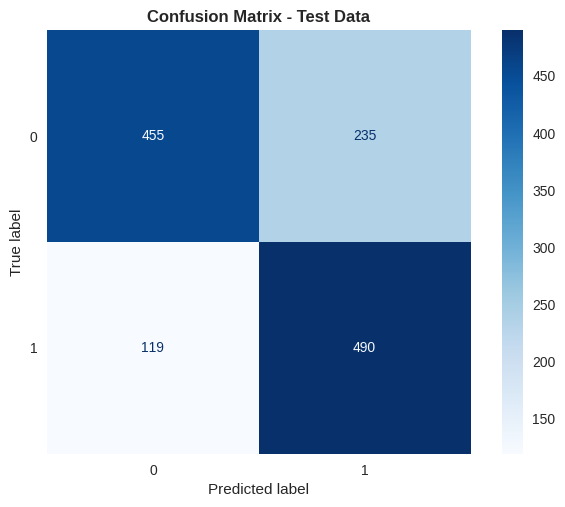

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_test_predict)

# Plotting CM
plt.style.use('seaborn-v0_8')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=my_pipeline.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.grid(False)
plt.title("Confusion Matrix - Test Data", fontweight = 'bold')
plt.show()
